# NNIA Assignment 4
**DEADLINE: 1.12.2023 0800 CET**
- Philipp Hawlitschek 7043167 (phha00002)
- William LaCroix 7038732 (wila00001)
- Hours of work per person:

# Submission Instructions
**IMPORTANT** Please make sure you read the following instructions carefully. If you are unclear about any part of the assignment, ask questions **before** the submission deadline. All course-related questions can be addressed on the course **CMS Forum**.

* Assignments are to be submitted in a **team of 2-3**. It is fine to submit first **2** assignments without a team, but starting from the **3rd** assignment it is not allowed.
* Please include your **names**, **ID's**, **Teams usernames**, and **approximate total time spent per person** at the beginning of the Notebook in the space provided
* Make sure you appropriately comment your code wherever required.
* Do **not** submit any data or cache files (e.g. `__pycache__`).
* Upload the **zipped** folder (`.zip` is the only accepted extension) in **CMS**.
* Only **one** member of the group should make the submission.
* **Important** please name the submitted zip folder as: `Name1_id1_Name2_id2(_Name3_id3).zip`. The Jupyter Notebook should also be named: `Name1_id1_Name2_id2.ipynb`. This is **very important** for our internal organization repeatedly students fail to do this.

<font color="red">Failure to follow the above instructions will result in point penalties at the discretion of the instructors.</font>


## 1 Manual Regression (5 points)

In this exercise, we will be working with the [California Housing Dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset), one of the real world datasets available in the scikit-learn library. Familiarize yourself with the dataset documentation to understand its structure and the variables included.

## 1.1 Dataset Overview
Begin by exploring the [documentation](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset). Answer the following questions:
1. According to this dataset, how many features influence the housing prices in California? List these features.
2. Identify which feature(s) you believe are the most influential in determining housing prices, and explain your reasoning.

In [370]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import seaborn as sb
import numpy as np

In [371]:
dataset = fetch_california_housing(as_frame=True)
dataset_frame = dataset.frame # full dataset with data and target
dataset_target = dataset.target # target values (median house value) from dataset_frame["MedHouseVal"]
dataset_data = dataset.data # data values from dataset_frame["MedInc":"Latitude"]
dataset_frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


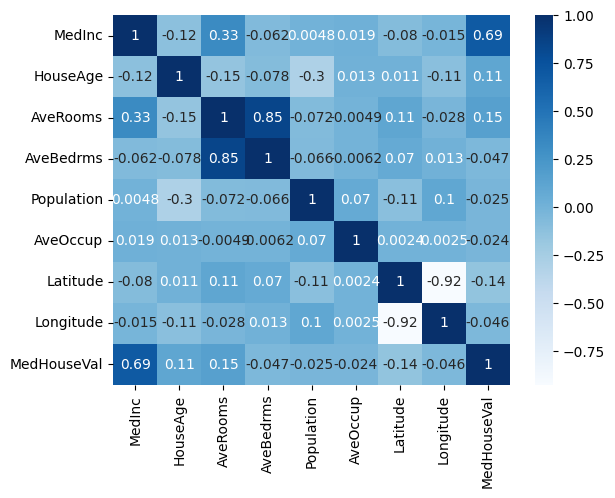

In [372]:

correlation = dataset_frame.corr()
sb.heatmap(correlation, cmap="Blues", annot=True)
ranking = correlation["MedHouseVal"].sort_values(ascending=False)

In [373]:
print("Correlation ranking of variables with respect to the target variable MedHouseVal:")
for i, variable in enumerate(ranking.index):
    if i == 0:
        continue
    print(f"{i}) {variable}:\t{ranking[i]}")

Correlation ranking of variables with respect to the target variable MedHouseVal:
1) MedInc:	0.6880752079585484
2) AveRooms:	0.15194828974145738
3) HouseAge:	0.10562341249321128
4) AveOccup:	-0.023737412956134355
5) Population:	-0.02464967888889485
6) Longitude:	-0.04596661511798309
7) AveBedrms:	-0.046700512969486685
8) Latitude:	-0.14416027687465632


## 1.1 Answers:

The predictive variables in the dataset are: ['MedInc', 'AveRooms', 'HouseAge', 'AveOccup', 'Population', 'Longitude', 'AveBedrms', 'Latitude']

Of these, MedInc seems to have the strongest correlation on MedHouseValue, with [AveRooms, HouseAge] showing mild positive relationships, and [Latitude] showing mild negative relationship.

These relationships mostly have straightforward interpretations:
- mo money, mo house 
- More rooms -> bigger house -> higher value
- Prices in the global South tend to be lower

However HouseAge showing positive correlation with MedHouseValue is somewhat surprising: I might have expected older properties to have depreciated, and/or newer construction to have higher value (think of the current housing crisis!).

## 1.2 Manual Regression

Now that you are a bit more familiar with the data and the features. This exercise aims to develop some intuition behind regressions by manually adjusting the parameters (coefficients and intercept) in the model. The functions below all perform regression (predicting a real value) but they are far from perfect. Your goal is to improve the four functions from the initial ones in the `code cells` as follows:

1. `hand_base` should serve as a baseline. The constraint is that it should only return a *single (constant) number* for all values. In other words, this is a model with no adjustable parameters. However, for the dataset there exists a unique value that minimizes the Mean Squared Error (MSE). Which one is it? (0.5 points) 
2. `hand_linear` should be a reasonable *linear* function that utilizes the input feature(s). Note that it should be strictly linear, that is in the form $\sum \lambda_i x_i+\lambda_{const}$ where $\lambda_k$ and $\lambda_{const}$ are the coefficients and intercept that you can estimate from the given data by *trial and error*. Your estimates should be reasonable, i.e. definitely better than `hand_base`. Do this exercise before proceeding to the next function where you will obtain the coefficients and intercepts from fitting a Linear Regression model using *sklearn*. We will award full points based on any justified solution that's better than `hand_base`. Make sure that you read what the features mean and argue why you chose the specific formula. (1 point) (Note: we are *not* asking you to compute the coefficients and intercept, but rather play around with adjusting the coefficients and intercept manually to arrive at your best estimate.)
3. `auto_linear`, obtain the coefficients and intercept from fitting a Linear Regression model using `sklearn`.
(Consult [sklearn Linear Regression Documention](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) on how to obtain the model's coefficients and intercept.) (1 point)

4. `hand_complex` does not have any restriction on the content of the function. It can contain polynomial relationships (e.g. `x[0]*x[0]`), `if-else` statements, etc.) Now that you have both your handcrafted model and the one from `sklearn`, improve upon either of the models (or you can start with the parameters in the `auto_linear` model) so that the performance of the `hand_complex` is better than `auto_linear`.
What are the disadvantages of this more complex approach apart from the difficulty of creating it? (Hint: think about unseen data.)

Always comment on what led you to select the specific values.

## 1.2 <font color="red">To Do</font>

Modify the functions in the `code cell` below.

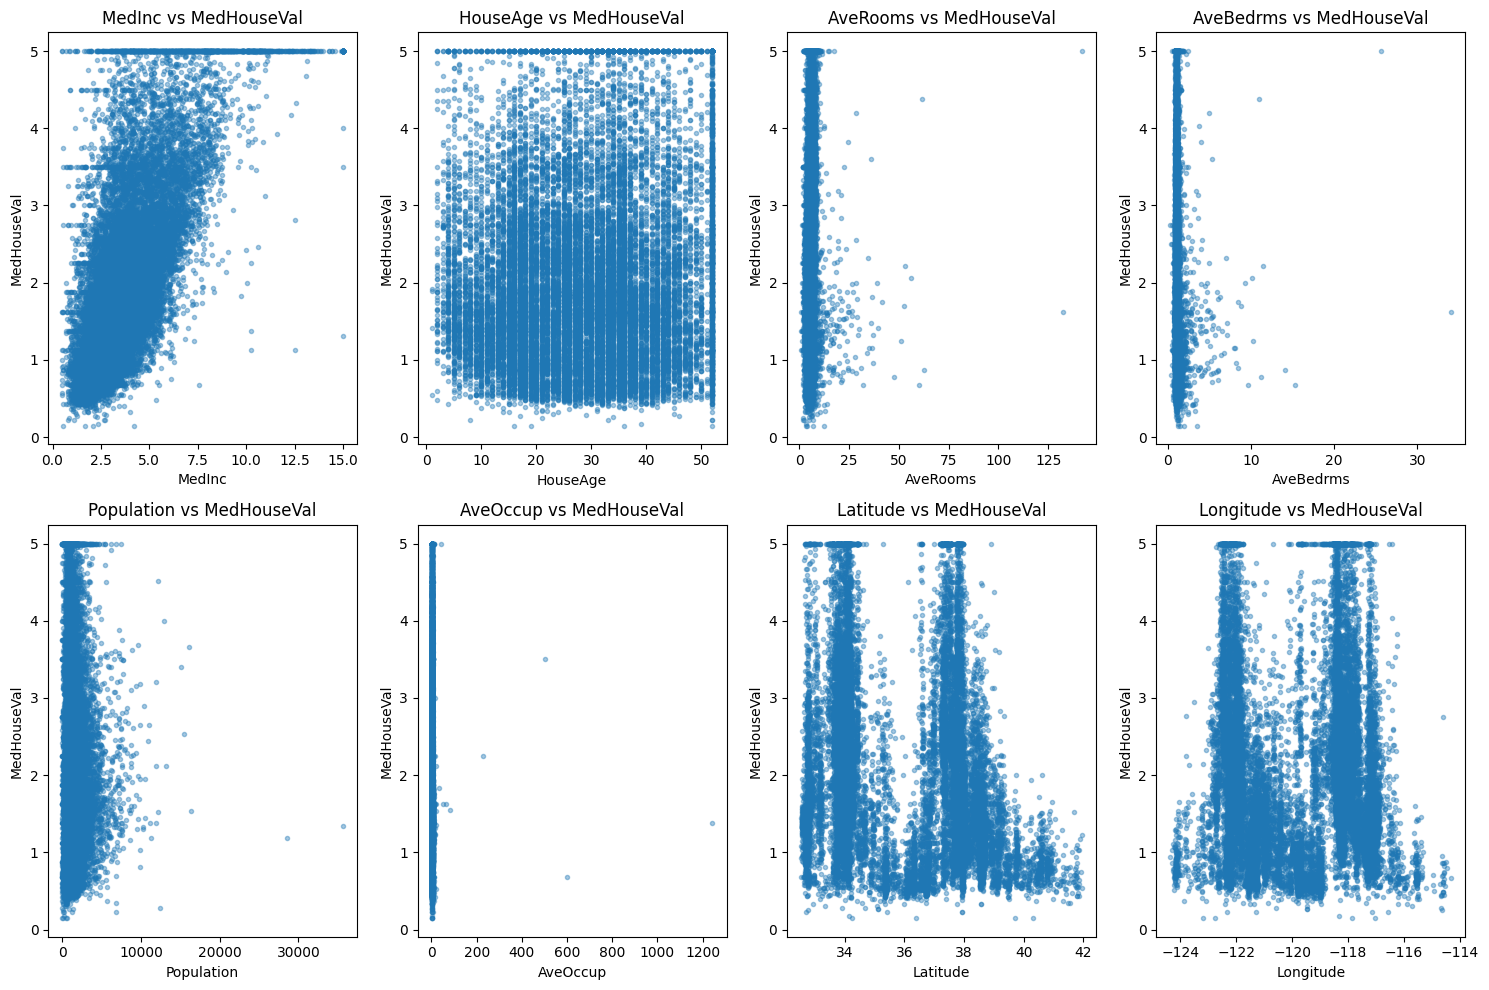

In [375]:
# plot input variables vs target variable in scatter subplots\
import matplotlib.pyplot as plt
fix, ax = plt.subplots(2, 4, figsize=(15, 10))

for i, variable in enumerate(dataset_frame.columns[:-1]):
    ax[i//4, i%4].scatter(dataset_frame[variable], dataset_frame["MedHouseVal"], alpha=0.4, marker=".")
    ax[i//4, i%4].set_xlabel(variable)
    ax[i//4, i%4].set_ylabel("MedHouseVal")
    ax[i//4, i%4].set_title(f"{variable} vs MedHouseVal")
plt.tight_layout()
plt.show()

In [376]:
%load_ext autoreload
%autoreload 2

from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression as LR

housing = fetch_california_housing()
housing_x = housing.data
housing_y = housing.target
housing_y_mean = housing_y.mean()

print("Features", housing.feature_names)

def hand_base(_x):
    # Expected value of the target variable with no parameters is just the average of the target variable
    return housing_y_mean

def hand_linear(x):
    # TODO: make me better than the hand_base function
    # How are we supposed to just guess this? I just adjusted single parameters wile the MSE kept getting lower...
    return 1.8*x[0]-0.1*x[1]-0.6*x[2]-0.007*x[7]+0.1 

# Linear model!
linear_model = LR()
# 1. Fit LinearRegression
linear_model.fit(housing_x, housing_y)
# 2. Report training MSE
print(f"MSE LR: {mse(housing_y, linear_model.predict(housing_x)):.2f}")
# 3. Examine the coefficients and intercept and use them for the `auto_linear` function
parameters = linear_model.coef_
print(f"Coefficients: {parameters}")
intercept = linear_model.intercept_
print(f"Intercept: {intercept}")
# <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html>

def auto_linear(x):
    # linear combination of input variables with parameters and intercept from the linear_model
    return np.sum([parameter*input for parameter, input in zip(parameters, x)]) + intercept

def hand_complex(x):
  # TODO: make me better than the auto_linear function
  if x[0] > 7 or x[2] > 15 or x[3] > 3 or x[4] > 10000: #or ((x[6] > 34 and x[6] < 37) or x[6] > 38):
    return 0.5*x[0]-0.1*x[1]-0.1
  else:
    return housing_y_mean
    #1.8*x[0]-0.1*x[1]-0.6*x[2]-0.007*x[7]+0.1 + 0.1*(x[6]-36)**2 + 0.5

print(f"MSE Hand-Base: {mse(housing_y, [hand_base(x) for x in housing_x]):.2f}")
print(f"MSE Hand-Linear: {mse(housing_y, [hand_linear(x) for x in housing_x]):.2f}")
print(f"MSE Auto-LR: {mse(housing_y, [auto_linear(x) for x in housing_x]):.2f}")
print(f"MSE Hand-Complex: {mse(housing_y, [hand_complex(x) for x in housing_x]):.2f}")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Features ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
MSE LR: 0.52
Coefficients: [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
Intercept: -36.94192020718445
MSE Hand-Base: 1.33
MSE Hand-Linear: 9.42
MSE Auto-LR: 0.52
MSE Hand-Complex: 1.59


## 1.2 Answers:

1) Setting the return value to the mean value of our target variable will minimize MSE
4) Primary difficulties in building more complex models are that: a) they take more time/resources to estimate, and b) mode complex models with higher capacity may end up overfitting the training data, and therefore not generalize well to unseen test data.

## 2 Overfitting (3 points)
Overfitting happens when the model capacity is too high and there is no proper regularization applied. Figure 1 and Figure 2 show two different classification boundaries for a binary classification problem, where the blue points and the red points represent the training data consisting out of two classes. Please answer the following questions. You may find the relevant content in the 'Deep Learning Book' helpful for this: [5.2 Capacity, Overfitting and Underfitting](https://www.deeplearningbook.org/contents/ml.html).  <br>

| --- | --- |
| ![Figure 1](fig1.png) | ![Figure 2](fig2.png) |
| Figure 1 | Figure 2 |


1. Which classification boundary correspond to the overfitting and the underfitting, respectively? Justify your answer in 1-2 sentences. (0.5 pt)
2. Explain the terms overfitting, underfitting, and model capacity with the help of Figure 1 and Figure 2. (1.5 pt)
3. What happens to the training error and validation error when a model overfits? Explain. (1 pt)

## 2 Answers:

1) Figure 2 (squiggly line) is overfit, seeing how it weaves through the training data making the decision boundary unsmooth (causing unusual exceptions). Figure 1 (straight line) is underfit, as it cuts through the data without accurately capturing the distribution.
2) Overfitting is caused by following training data too closely (especially when data variance is high), causing the model not to generalize well. Underfitting is caused when a model is not flexible enough to accurately capture the distribution of the data. Model capacity is the model's ability to conform to the trainig data (flexibility); too low capacity, and the model will underfit, too high capacity and the model will overfit.
3) When a model overfits, it may perfectly capture the training data (training error approaches 0), while failing to generalize to the actual data distribution (validation data increases while training error decreases)

## 3 Evaluation Metrics (2 points)

In the lecture slides (Chapter 4, page 9 "The Performance Measure $P$"), there is some brief discussion about evaluation metrics. Additionally, watch [this video about evaluation metrics](https://youtu.be/wpQiEHYkBys). Discuss the differences between Accuracy, Precision, Recall, F1, MCC (Mathews Correlation Coeffcient):

1. How are they calculated? (0.5 points)
2. In which case can a model get the perfect score? (0.5 points)
3. Give examples of situations when you would prefer one over the others. (0.5 points)
4. Choose one metric. In which case can a model get a very high score even though we would judge its performance to be bad? I.e. how can the model cheat the metric? (0.5 points)


